# Imports

In [12]:
import sys
import os
from google.colab import drive
from google.colab import files
from dotenv import load_dotenv
import json
import warnings
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


!pip install papermill
!pip install nbconvert
!pip install nbformat
!pip install IPython

import papermill as pm
import nbformat
from nbconvert import HTMLExporter
from IPython.display import HTML, display

warnings.filterwarnings("ignore")
%matplotlib inline

# Bootstrap

In [13]:
np.random.seed(31071967)

# Find and load the .env file from the current or parent directories
load_dotenv()

drive.mount('/content/drive')

with open(f"{os.getenv('PROJECT_PATH')}/src/config.json", 'r') as f:
    project_config = json.load(f)
    project_config.pop('_comment', None)
    project_config.pop('_note', None)
    f.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# sanity check
project_config["TKL"]

'INTC'

In [15]:
def run_notebook(notebook_name, output_name, parameters=None):

  # --- Execute the proviuse notebook with parameters ---
  pm.execute_notebook(
      input_path = notebook_name,
      output_path = output_name,
      log_output=False,  # don't print logs while running
      progress_bar=True
  )

  # --- Convert the executed notebook to HTML ---
  nb = nbformat.read(output_name, as_version=4)
  html_exporter = HTMLExporter()
  html_exporter.template_name = "lab"  # modern look; alternatives: 'classic', 'basic'
  body, _ = html_exporter.from_notebook_node(nb)

  # --- Display the HTML result inline ---
  display(HTML(body))

In [16]:
def dataprep_for_train():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook1']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output1']}"

  run_notebook(input_file, output_file)

In [17]:
def train_models():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook2']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output2']}"

  run_notebook(input_file, output_file)

In [18]:
def imagesprep_for_train():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook5']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output5']}"

  run_notebook(input_file, output_file)

In [19]:
def train_fastai():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook6']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output6']}"

  run_notebook(input_file, output_file)

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]


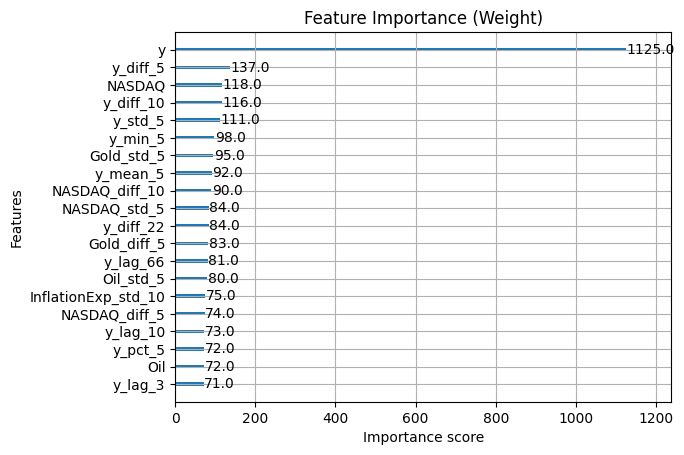
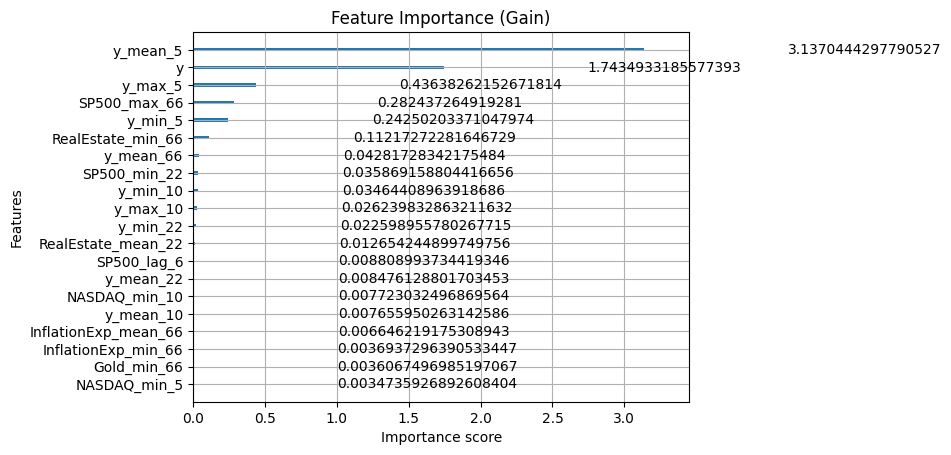

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

PapermillExecutionError: 
---------------------------------------------------------------------------
Exception encountered at "In [9]":
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/tmp/ipython-input-3711590277.py in <cell line: 0>()
----> 1 results_df, dates_test, unscaled_y_test = race_models(project_config['TKL'], project_config['RACING_MODELS'].split())
      2 plot_results(results_df, dates_test, unscaled_y_test)
      3 
      4 print(f"AND THE WINNER for {project_config['TKL']} IS ...")
      5 display(results_df[['model_name', 'X_cols', 'mae', 'r2']].sort_values(by='mae', ascending=True))

KeyError: 'RACING_MODELS'


In [20]:
dataprep_for_train()
train_models()

imagesprep_for_train()
train_fastai()